## Predicting housing prices

In [396]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import scipy.stats as stats
from scipy.stats import norm

In [2]:
#changing view columns
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

In [3]:
#importing data
df = pd.read_csv('./train.csv')

In [4]:
#looking at the size of the data set 
df.shape

(1460, 81)

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## First glance

In [6]:
#looking at nulls
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [9]:
sns.distplot(df.SalePrice,)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [300]:
plt.show()

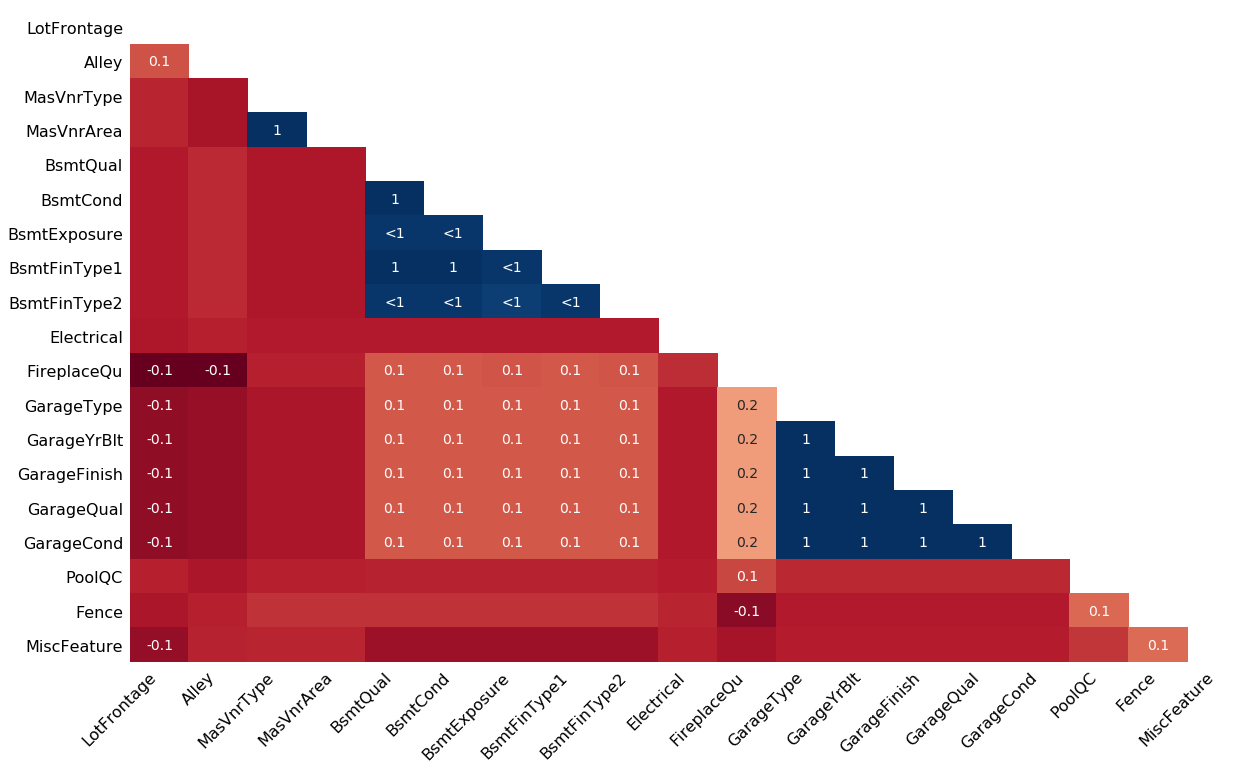

In [11]:
#looking at missing data correlation
msno.heatmap(df)

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


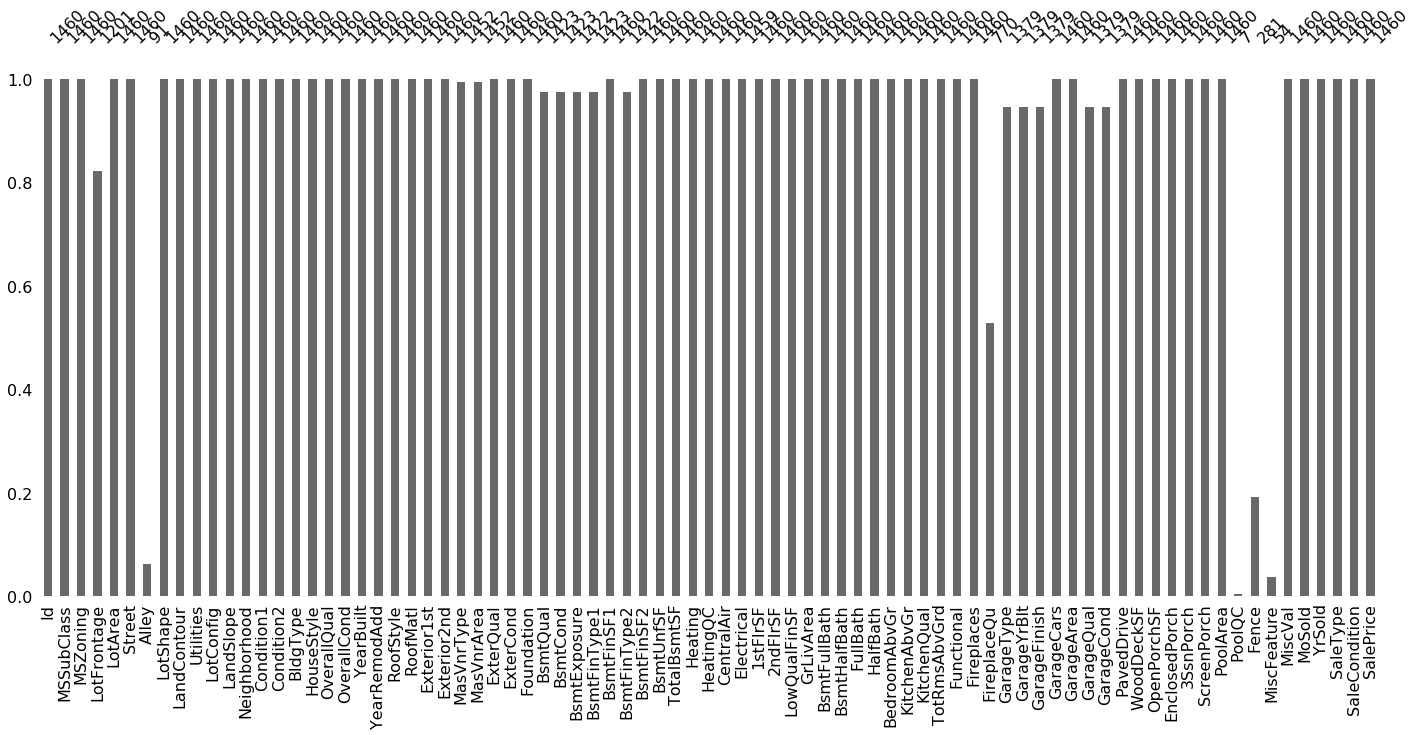

In [12]:
msno.bar(df)

In [13]:
#looking at a heatmap
plt.figure(figsize=(17,17))
sns.heatmap(df.corr())

In [14]:
#looking at some of the important variables
#creating path
sale_price = df.SalePrice

In [15]:
#boxplot of overallqual
sns.boxplot(df.OverallQual,sale_price)

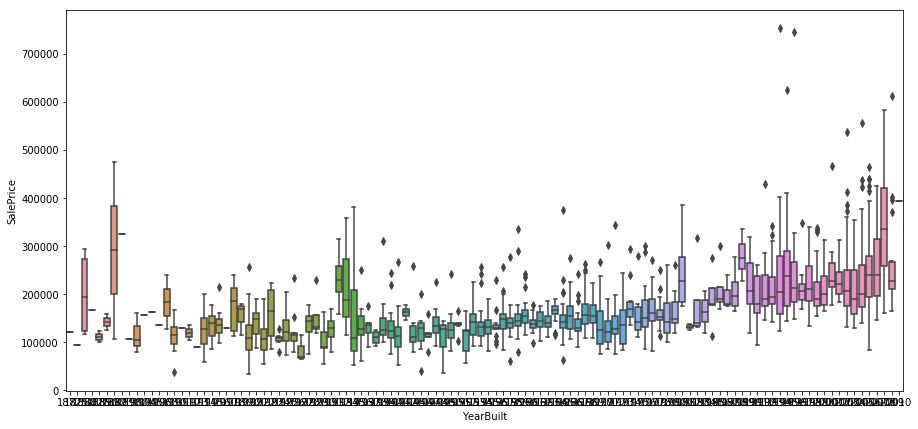

In [16]:
#looking at year build
plt.figure(figsize=(15,7))
sns.boxplot(df.YearBuilt,sale_price)

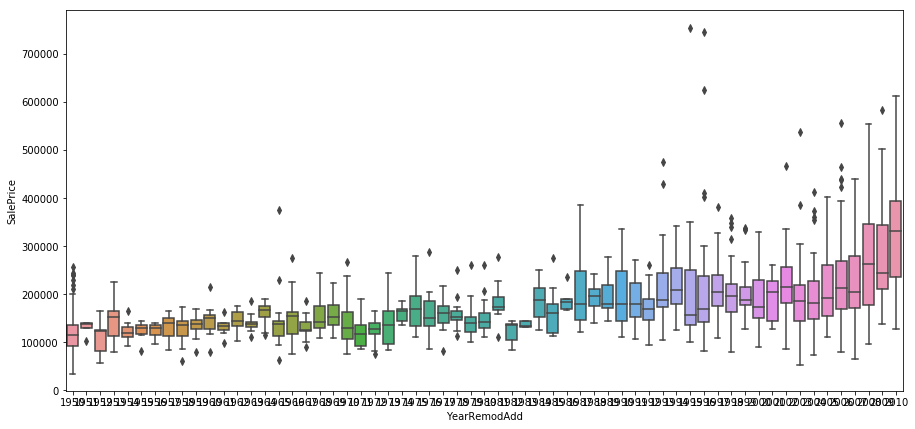

In [17]:
#looking at year remodeled
plt.figure(figsize=(15,7))
sns.boxplot(df.YearRemodAdd,sale_price)

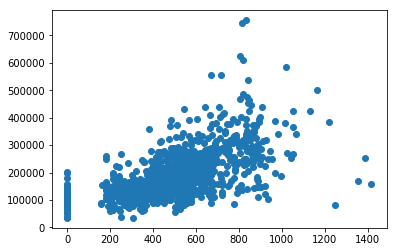

In [18]:
#garage area
plt.scatter(df.GarageArea,sale_price)

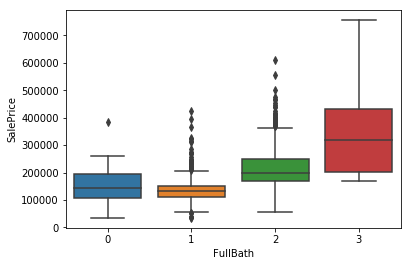

In [19]:
#full bath
sns.boxplot(df.FullBath,sale_price)

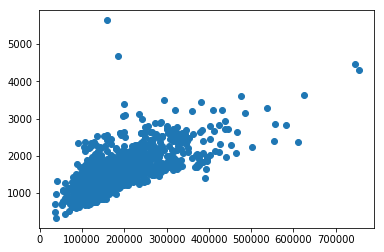

In [20]:
#grlivarea
plt.scatter(sale_price,df.GrLivArea)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


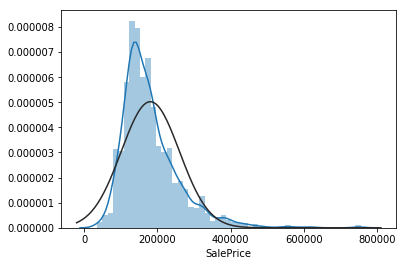

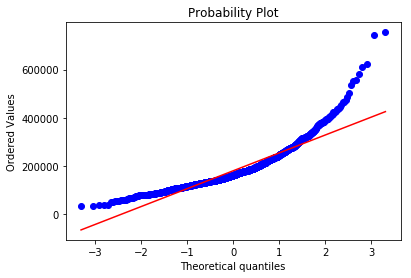

In [397]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

## making smaller datasets 

In [21]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
lots = ['Id','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig']
lots_df = df[lots]
lots_df = lots_df.copy()

In [23]:
properties = ['Id','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu']

props_df = df[properties]
props_df = props_df.copy()

In [24]:
outside = ['Id','GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
outside_df = df[outside]
outside_df = outside_df.copy()

### Lots df


In [25]:
#looking at lots 
print(lots_df.shape)
lots_df.head()

(1460, 11)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  
0         Lvl    AllPub    Inside  
1         Lvl    AllPub       FR2  
2         Lvl    AllPub    Inside  
3         Lvl    AllPub    Corner  
4         Lvl    AllPub       FR2

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


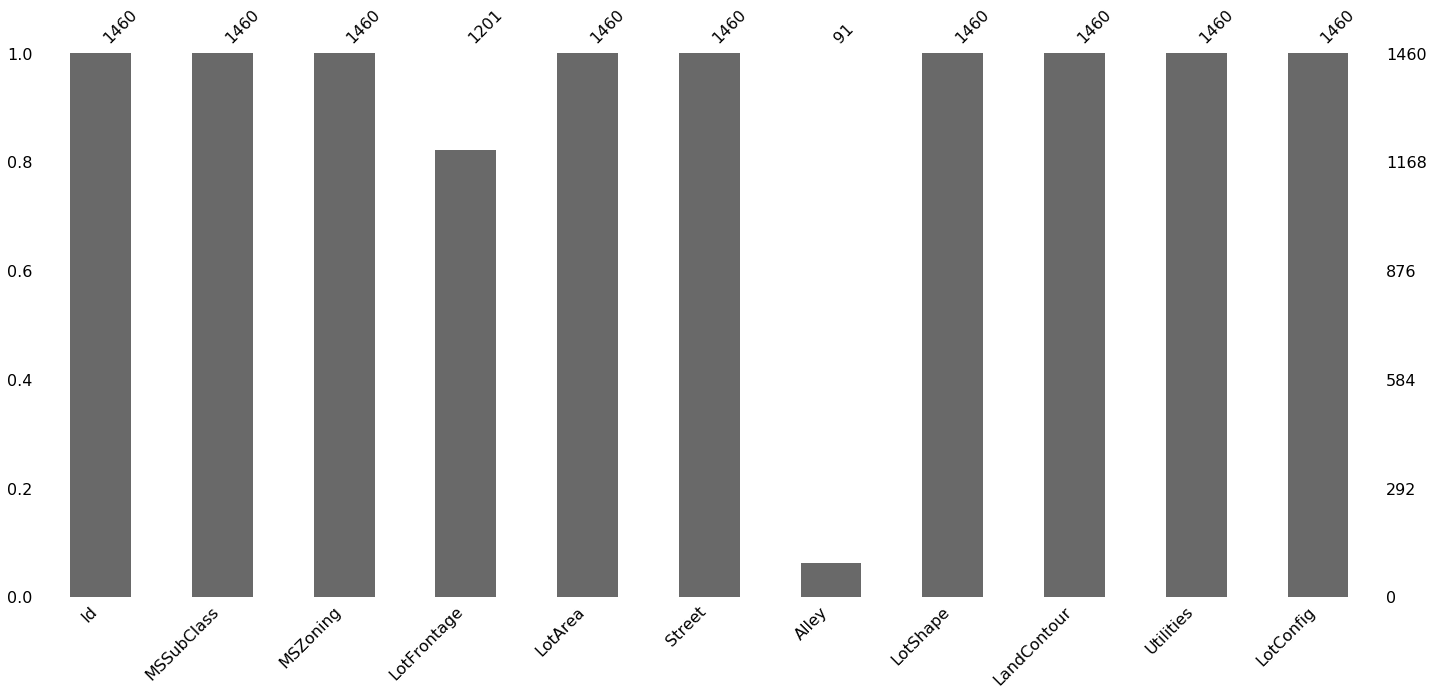

In [26]:
#inspecting missing numbers
msno.bar(lots_df)

In [27]:
lots_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
dtype: int64

#### fixing columns

In [28]:
#fixing the non integer columns
lots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
Id             1460 non-null int64
MSSubClass     1460 non-null int64
MSZoning       1460 non-null object
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
Street         1460 non-null object
Alley          91 non-null object
LotShape       1460 non-null object
LandContour    1460 non-null object
Utilities      1460 non-null object
LotConfig      1460 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 125.5+ KB


In [29]:
#changing MSZoning
lots_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [30]:
#changing the values into integers
mszone = [0 if x == 'RL' else 1 if x == 'RM' else 2 if x == 'FV' else 3 if x == 'RH' else 4 for x in lots_df.MSZoning]
pd.Series(mszone).value_counts()

0    1151
1     218
2      65
3      16
4      10
dtype: int64

In [31]:
lots_df['MSZoning'] = mszone

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


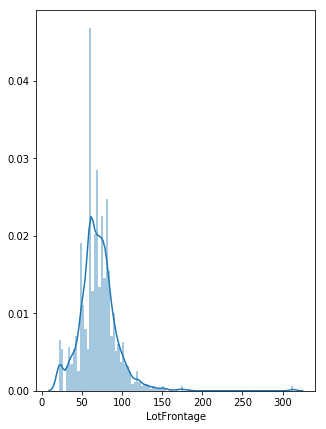

In [38]:
#cleaning LotFrontage
plt.figure(figsize=(5,7),)
sns.distplot(lots_df.LotFrontage.dropna(),bins=100)


In [39]:
#simple imputation of mean
fill_lots = lots_df.LotFrontage.mean()
lots_df.LotFrontage.fillna(float(fill_lots),inplace=True)

In [40]:
lots_df.LotFrontage.isna().sum()

0

In [41]:
#Looking at Street
lots_df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [42]:
#changing Streets to integer
street = [0 if x =='Pave' else 1 for x in lots_df.Street]
pd.Series(street).value_counts()

0    1454
1       6
dtype: int64

In [43]:
#adding to the datafram
lots_df['Street'] = street

In [44]:
#checking everything worked
lots_df.Street.value_counts()

0    1454
1       6
Name: Street, dtype: int64

In [45]:
#Alley -- still have to fix --
lots_df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [46]:
for i in lots_df.Alley.value_counts(dropna=False):
    print (i)

1369
50
41


In [47]:
alley_names =[str(x) for x in lots_df.Alley.unique()]
alley_names

['nan', 'Grvl', 'Pave']

<BarContainer object of 3 artists>

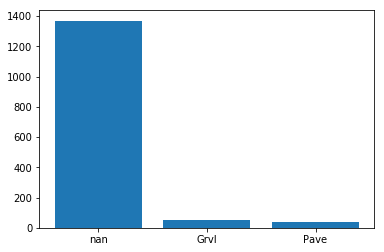

In [48]:
#looking at nulls compared to te other values
plt.bar(alley_names,lots_df.Alley.value_counts(dropna=False))

In [49]:
#deciding to make nan a true value
#filling all null vals with na 
lots_df.Alley.fillna('Na',inplace=True)

In [50]:
lots_df['Alley']= lots_df.Alley.map({'Na':0,'Grvl':1,'Pave':2})

In [51]:
#LotShape
lots_df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [52]:
#turning lotshaps values to integers
shapeslot = {'Reg':0, 'IR1':1, 'IR2': 2,'IR3':3 }
lots_df['LotShape'] = lots_df.LotShape.map(shapeslot)

In [53]:
#LandContour
lots_df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [54]:
#changing values
landcont = {'Lvl':0,'Bnk':1,'HLS':2,'Low':3}
lots_df['LandContour'] = lots_df.LandContour.map(landcont)

In [55]:
lots_df.LandContour.value_counts()

0    1311
1      63
2      50
3      36
Name: LandContour, dtype: int64

In [56]:
#Cleaning Utlities
lots_df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [57]:
utils = [0 if x == 'AllPub' else 1 for x in lots_df.Utilities]
lots_df['Utilities'] = utils

In [58]:
lots_df.Utilities.value_counts()

0    1459
1       1
Name: Utilities, dtype: int64

In [59]:
#LotConfig
lots_df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [60]:
lotconf = {'Inside':0, 'Corner':1, 'CulDSac':2 ,'FR2':3 ,'FR3':4 }
lots_df['LotConfig']= lots_df['LotConfig'].map(lotconf)

In [61]:
lots_df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         0         65.0     8450       0      0         0   
1   2          20         0         80.0     9600       0      0         0   
2   3          60         0         68.0    11250       0      0         1   
3   4          70         0         60.0     9550       0      0         1   
4   5          60         0         84.0    14260       0      0         1   

   LandContour  Utilities  LotConfig  
0            0          0          0  
1            0          0          3  
2            0          0          0  
3            0          0          1  
4            0          0          3

In [62]:
lots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
Id             1460 non-null int64
MSSubClass     1460 non-null int64
MSZoning       1460 non-null int64
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
Street         1460 non-null int64
Alley          1460 non-null int64
LotShape       1460 non-null int64
LandContour    1460 non-null int64
Utilities      1460 non-null int64
LotConfig      1460 non-null int64
dtypes: float64(1), int64(10)
memory usage: 125.5 KB


In [63]:
lots_df.describe().T

count          mean          std     min      25%          50%  \
Id           1460.0    730.500000   421.610009     1.0   365.75   730.500000   
MSSubClass   1460.0     56.897260    42.300571    20.0    20.00    50.000000   
MSZoning     1460.0      0.298630     0.668388     0.0     0.00     0.000000   
LotFrontage  1460.0     70.049958    22.024023    21.0    60.00    70.049958   
LotArea      1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.500000   
Street       1460.0      0.004110     0.063996     0.0     0.00     0.000000   
Alley        1460.0      0.090411     0.372151     0.0     0.00     0.000000   
LotShape     1460.0      0.408219     0.582296     0.0     0.00     0.000000   
LandContour  1460.0      0.185616     0.606509     0.0     0.00     0.000000   
Utilities    1460.0      0.000685     0.026171     0.0     0.00     0.000000   
LotConfig    1460.0      0.416438     0.773448     0.0     0.00     0.000000   

                  75%       max  
Id            1095.25    1460.0  
MSSubClass      70.00     190.0  
MSZoning         0.00       4.0  
LotFrontage     79.00     313.0  
LotArea      11601.50  215245.0  
Street           0.00       1.0  
Alley            0.00       2.0  
LotShape         1.00       3.0  
LandContour      0.00       3.0  
Utilities        0.00       1.0  
LotConfig        1.00       4.0

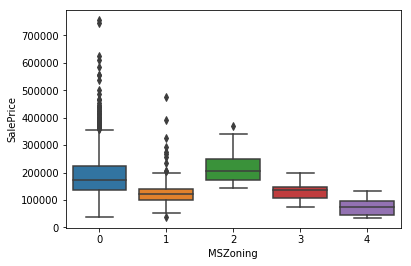

In [64]:
sns.boxplot(lots_df.MSZoning,sale_price)

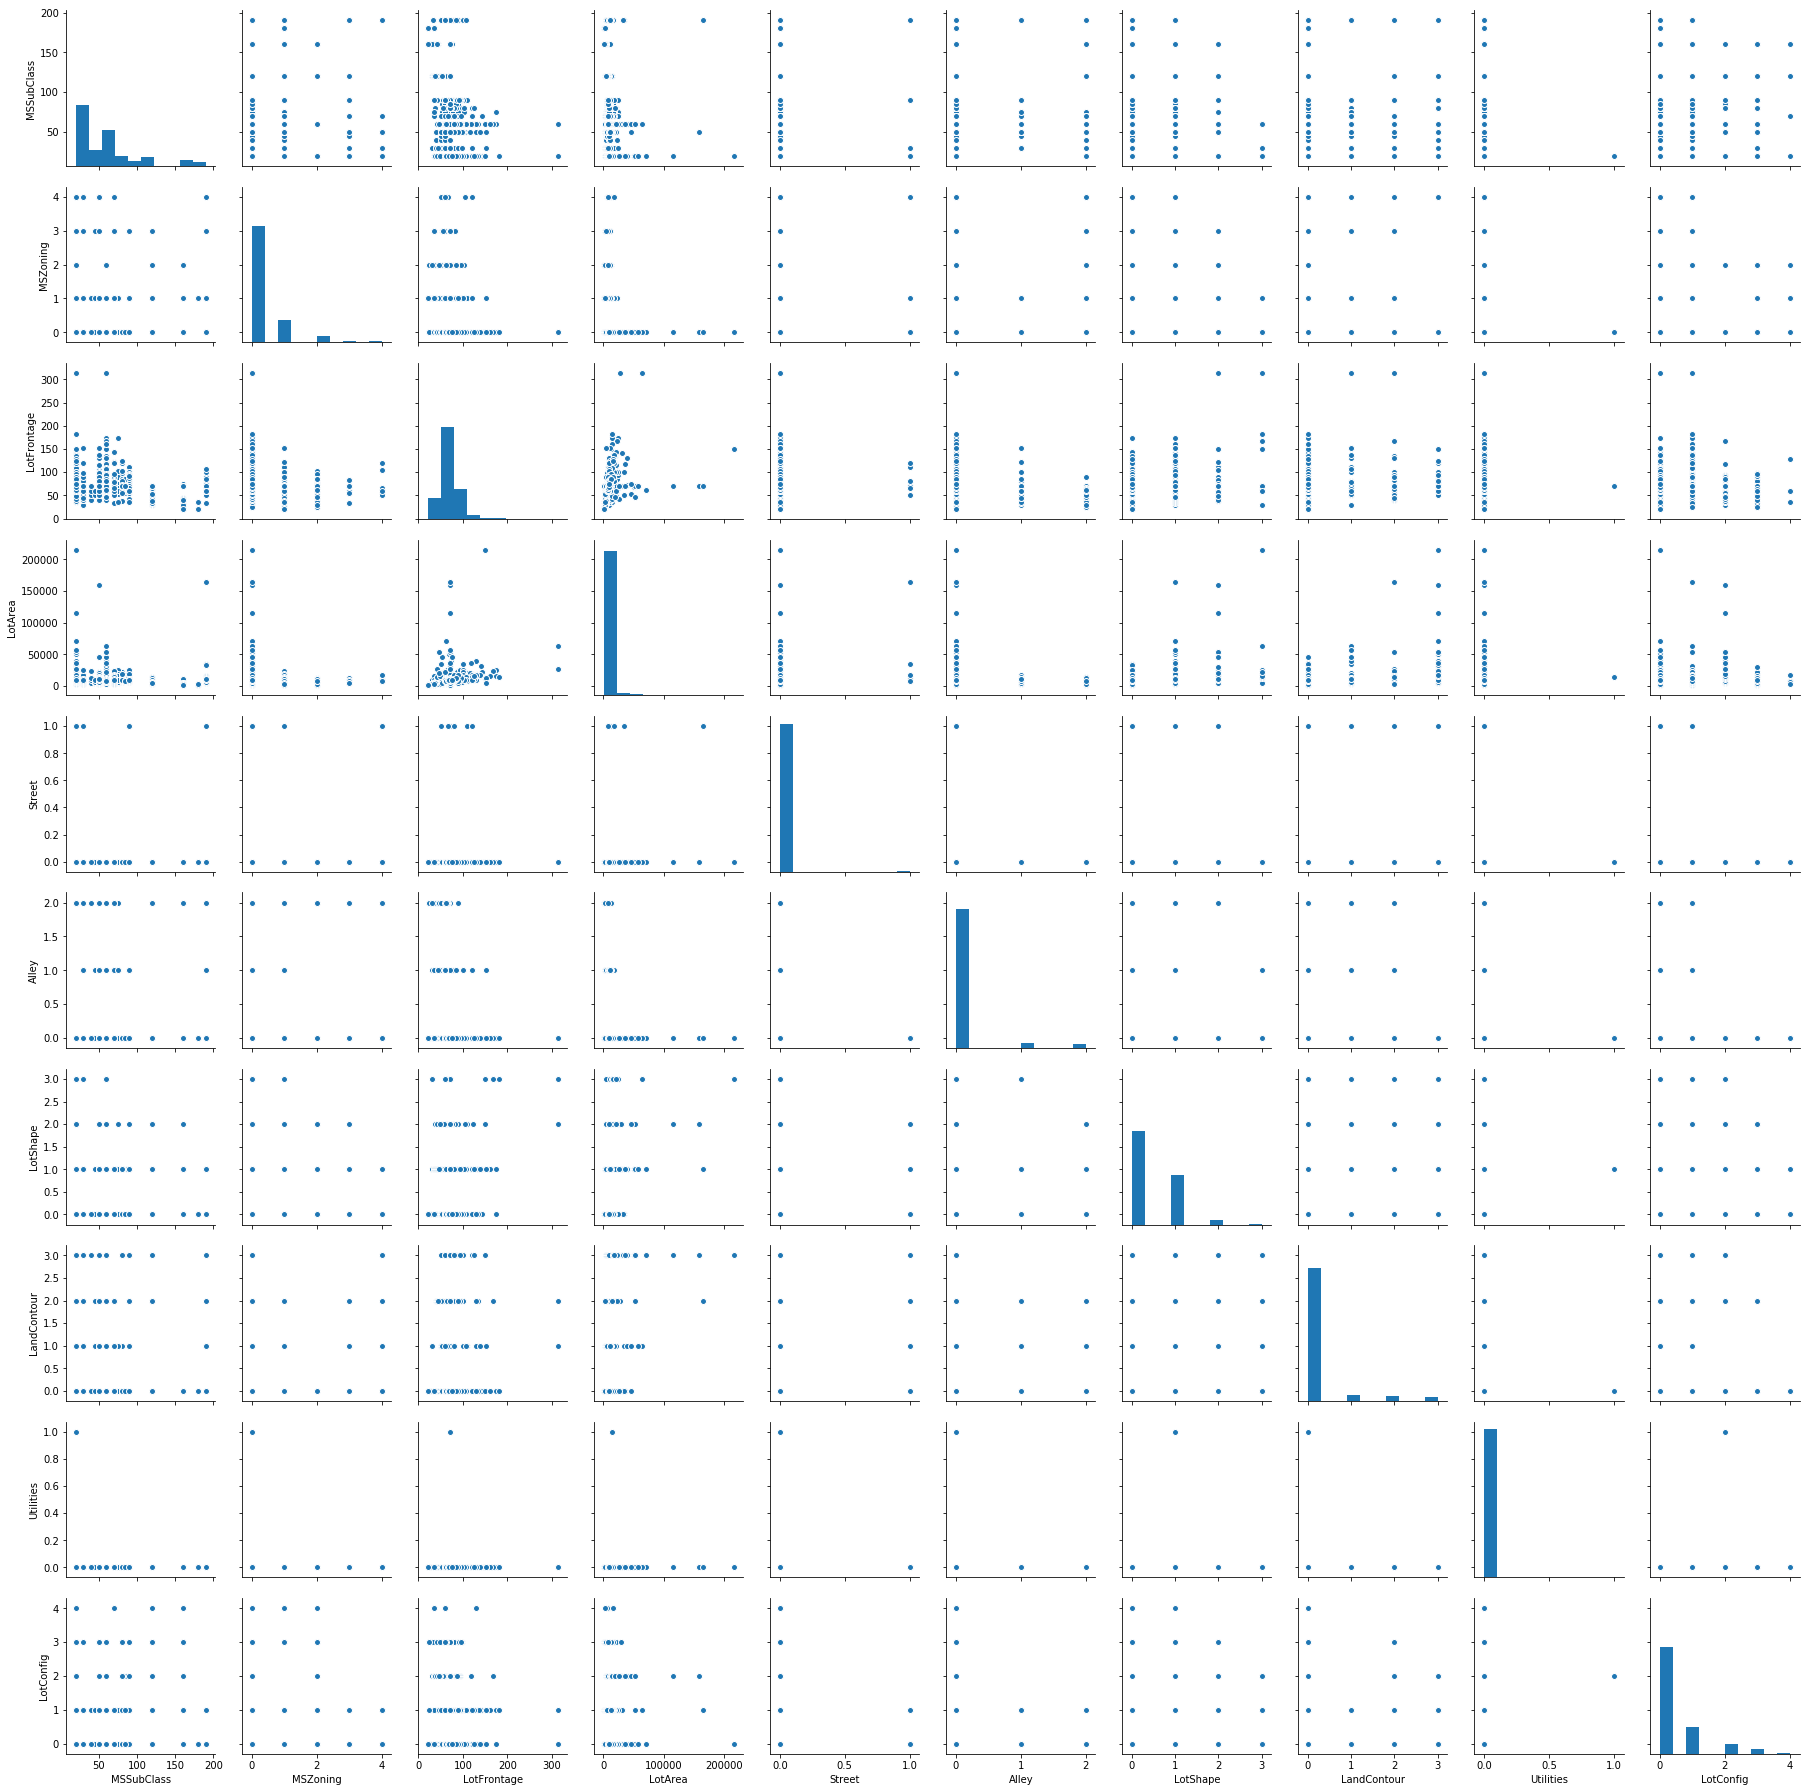

In [65]:
sns.pairplot(lots_df.iloc[:,1:])

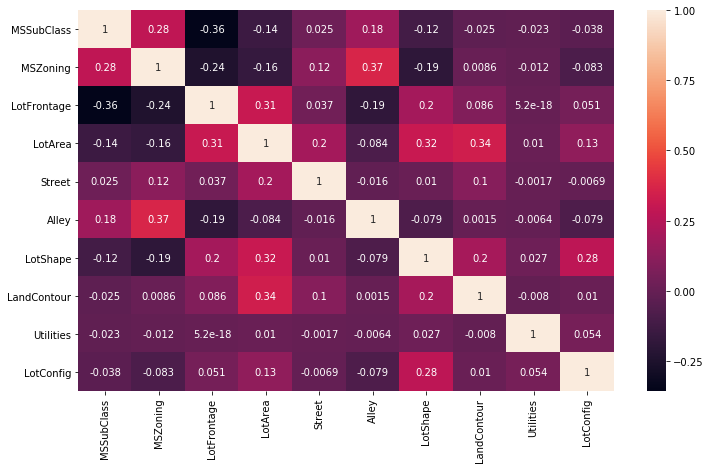

In [66]:
plt.figure(figsize = (12,7))
sns.heatmap(lots_df.iloc[:,1:].corr(),annot=True)

### Properties df

In [67]:
#looking at properties
print(props_df.shape)
props_df.head()

(1460, 48)


Id LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0   1       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1   2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2   3       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3   4       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   5       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  
0          Gd             8        Typ           0         NaN  
1          TA             6        Typ           1          TA  
2          Gd             6        Typ           1          TA  
3          Gd             7        Typ           1          Gd  
4          Gd             9        Typ           1          TA

In [68]:
props_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
Id              1460 non-null int64
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
ExterQual       1460 non-null object
ExterCond       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF

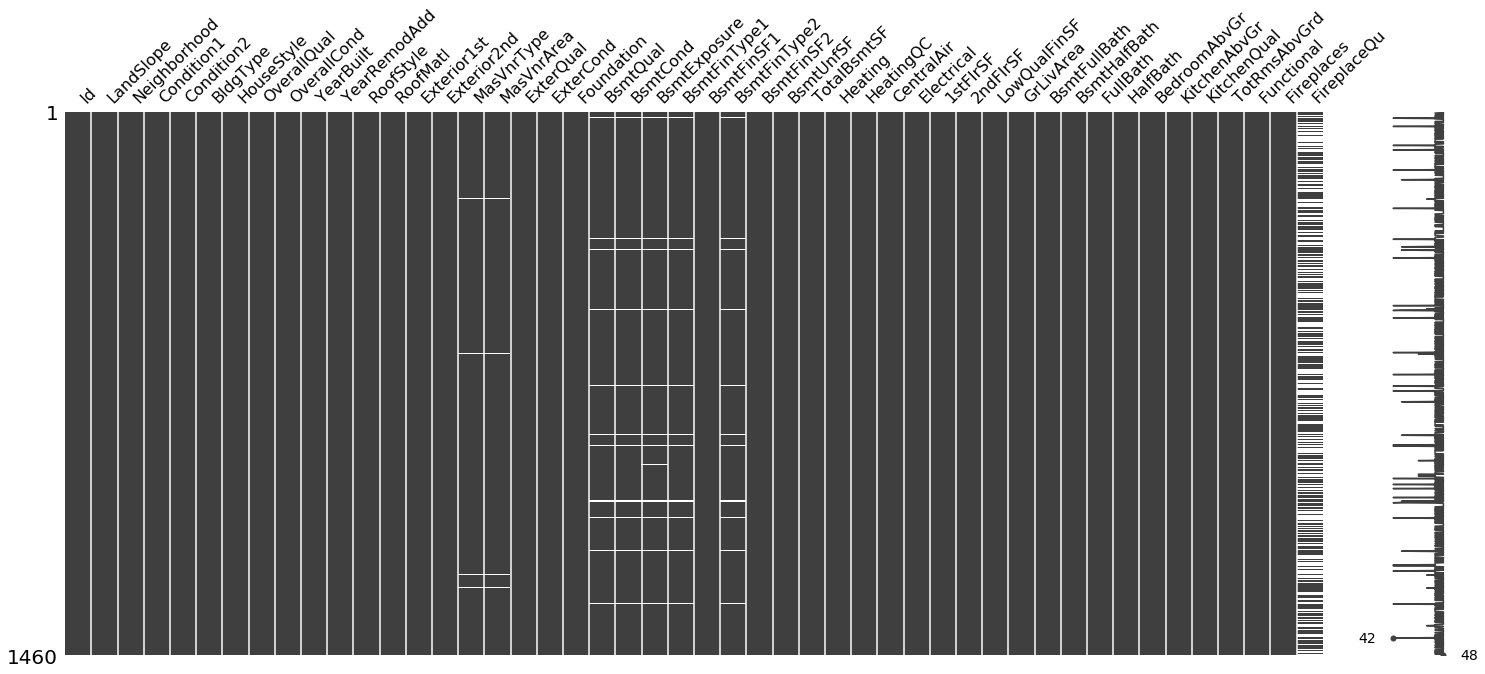

In [69]:
msno.matrix(props_df)

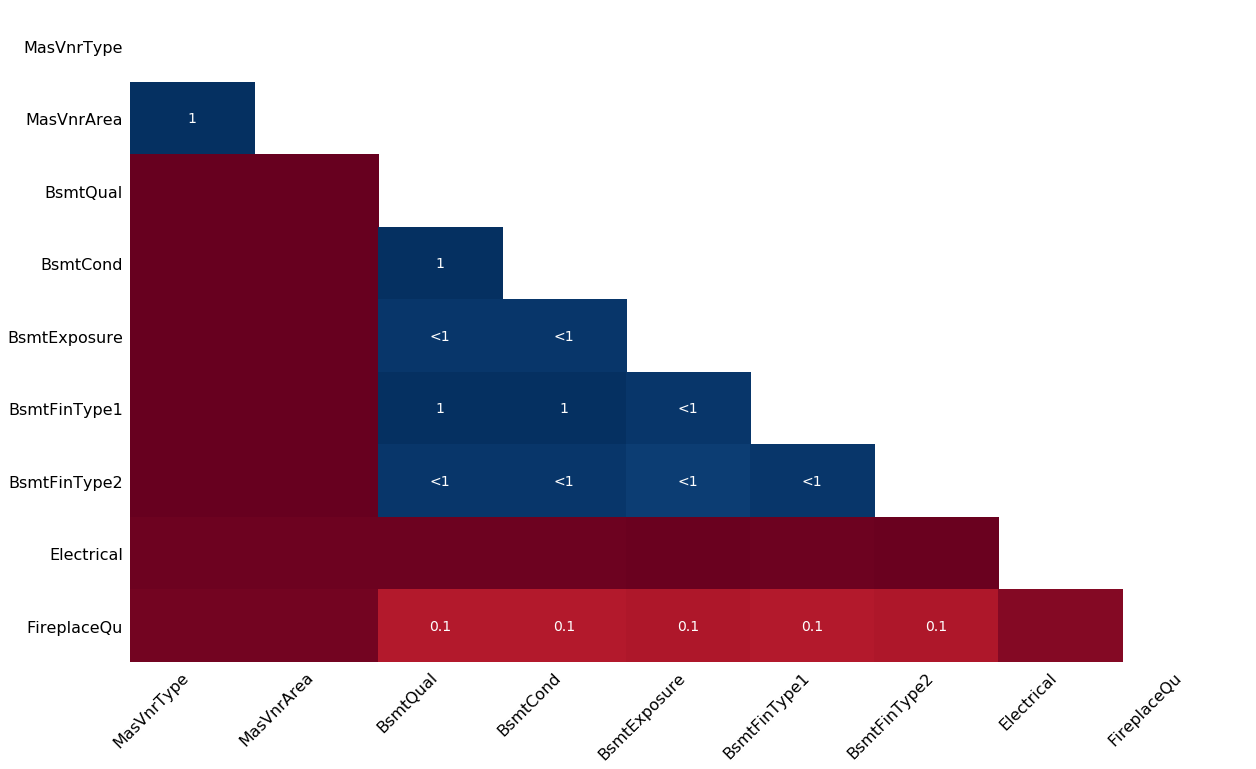

In [70]:
msno.heatmap(props_df)

In [71]:
props_df.isna().sum()

Id                0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
dtype: int64

In [72]:
#looking at all the type objects 
for i in props_df.columns[1:5]:
    if props_df[i].isna().sum() == 0 and props_df[i].dtype == 'object':
        print(i,props_df[i].unique())
        print("unique values:",props_df[i].nunique())
        print(props_df[i].dtype)
        print()

LandSlope ['Gtl' 'Mod' 'Sev']
unique values: 3
object

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
unique values: 25
object

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
unique values: 9
object

Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
unique values: 8
object



In [73]:
#manual get dummies except each unique value is a differnet number from 0-n
#trying to make keep same amount of columns 
def dummy_out(col_names,df):
    df = df.copy()
    
    #creating a dict that will map and replace values like previously
    def replace_dict(col):
        rep = {}
        tik = 0
        for n in df[col].unique():
            rep[n] = tik
            tik += 1
        return(rep)   

    #goes throught the dictionary with chosen column names calls the funciton above and
    #maps the copied df and changes the values 
    for i in df[col_names]:
        new_dict = replace_dict(i)
        df[i] = df[i].map(new_dict)
        print(i,new_dict)
    return (df)

In [74]:
#creating a list of object classes with no nulls
complete_class = []
for i in props_df.columns[1:]:
    if props_df[i].isna().sum() == 0 and props_df[i].dtype == 'object':
        complete_class.append(i)

In [75]:
test = ['Foundation','BsmtQual','BsmtExposure']
new_props_df = dummy_out(complete_class,props_df)
#props_df = new_props_df

LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood {'CollgCr': 0, 'Veenker': 1, 'Crawfor': 2, 'NoRidge': 3, 'Mitchel': 4, 'Somerst': 5, 'NWAmes': 6, 'OldTown': 7, 'BrkSide': 8, 'Sawyer': 9, 'NridgHt': 10, 'NAmes': 11, 'SawyerW': 12, 'IDOTRR': 13, 'MeadowV': 14, 'Edwards': 15, 'Timber': 16, 'Gilbert': 17, 'StoneBr': 18, 'ClearCr': 19, 'NPkVill': 20, 'Blmngtn': 21, 'BrDale': 22, 'SWISU': 23, 'Blueste': 24}
Condition1 {'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'RRAn': 6, 'PosA': 7, 'RRNe': 8}
Condition2 {'Norm': 0, 'Artery': 1, 'RRNn': 2, 'Feedr': 3, 'PosN': 4, 'PosA': 5, 'RRAn': 6, 'RRAe': 7}
BldgType {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4}
HouseStyle {'2Story': 0, '1Story': 1, '1.5Fin': 2, '1.5Unf': 3, 'SFoyer': 4, 'SLvl': 5, '2.5Unf': 6, '2.5Fin': 7}
RoofStyle {'Gable': 0, 'Hip': 1, 'Gambrel': 2, 'Mansard': 3, 'Flat': 4, 'Shed': 5}
RoofMatl {'CompShg': 0, 'WdShngl': 1, 'Metal': 2, 'WdShake': 3, 'Membran': 4, 'Tar&Grv': 5, 'Roll': 6, 

In [76]:
new_props_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
Id              1460 non-null int64
LandSlope       1460 non-null int64
Neighborhood    1460 non-null int64
Condition1      1460 non-null int64
Condition2      1460 non-null int64
BldgType        1460 non-null int64
HouseStyle      1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null int64
RoofMatl        1460 non-null int64
Exterior1st     1460 non-null int64
Exterior2nd     1460 non-null int64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
ExterQual       1460 non-null int64
ExterCond       1460 non-null int64
Foundation      1460 non-null int64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF1      1460 n

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


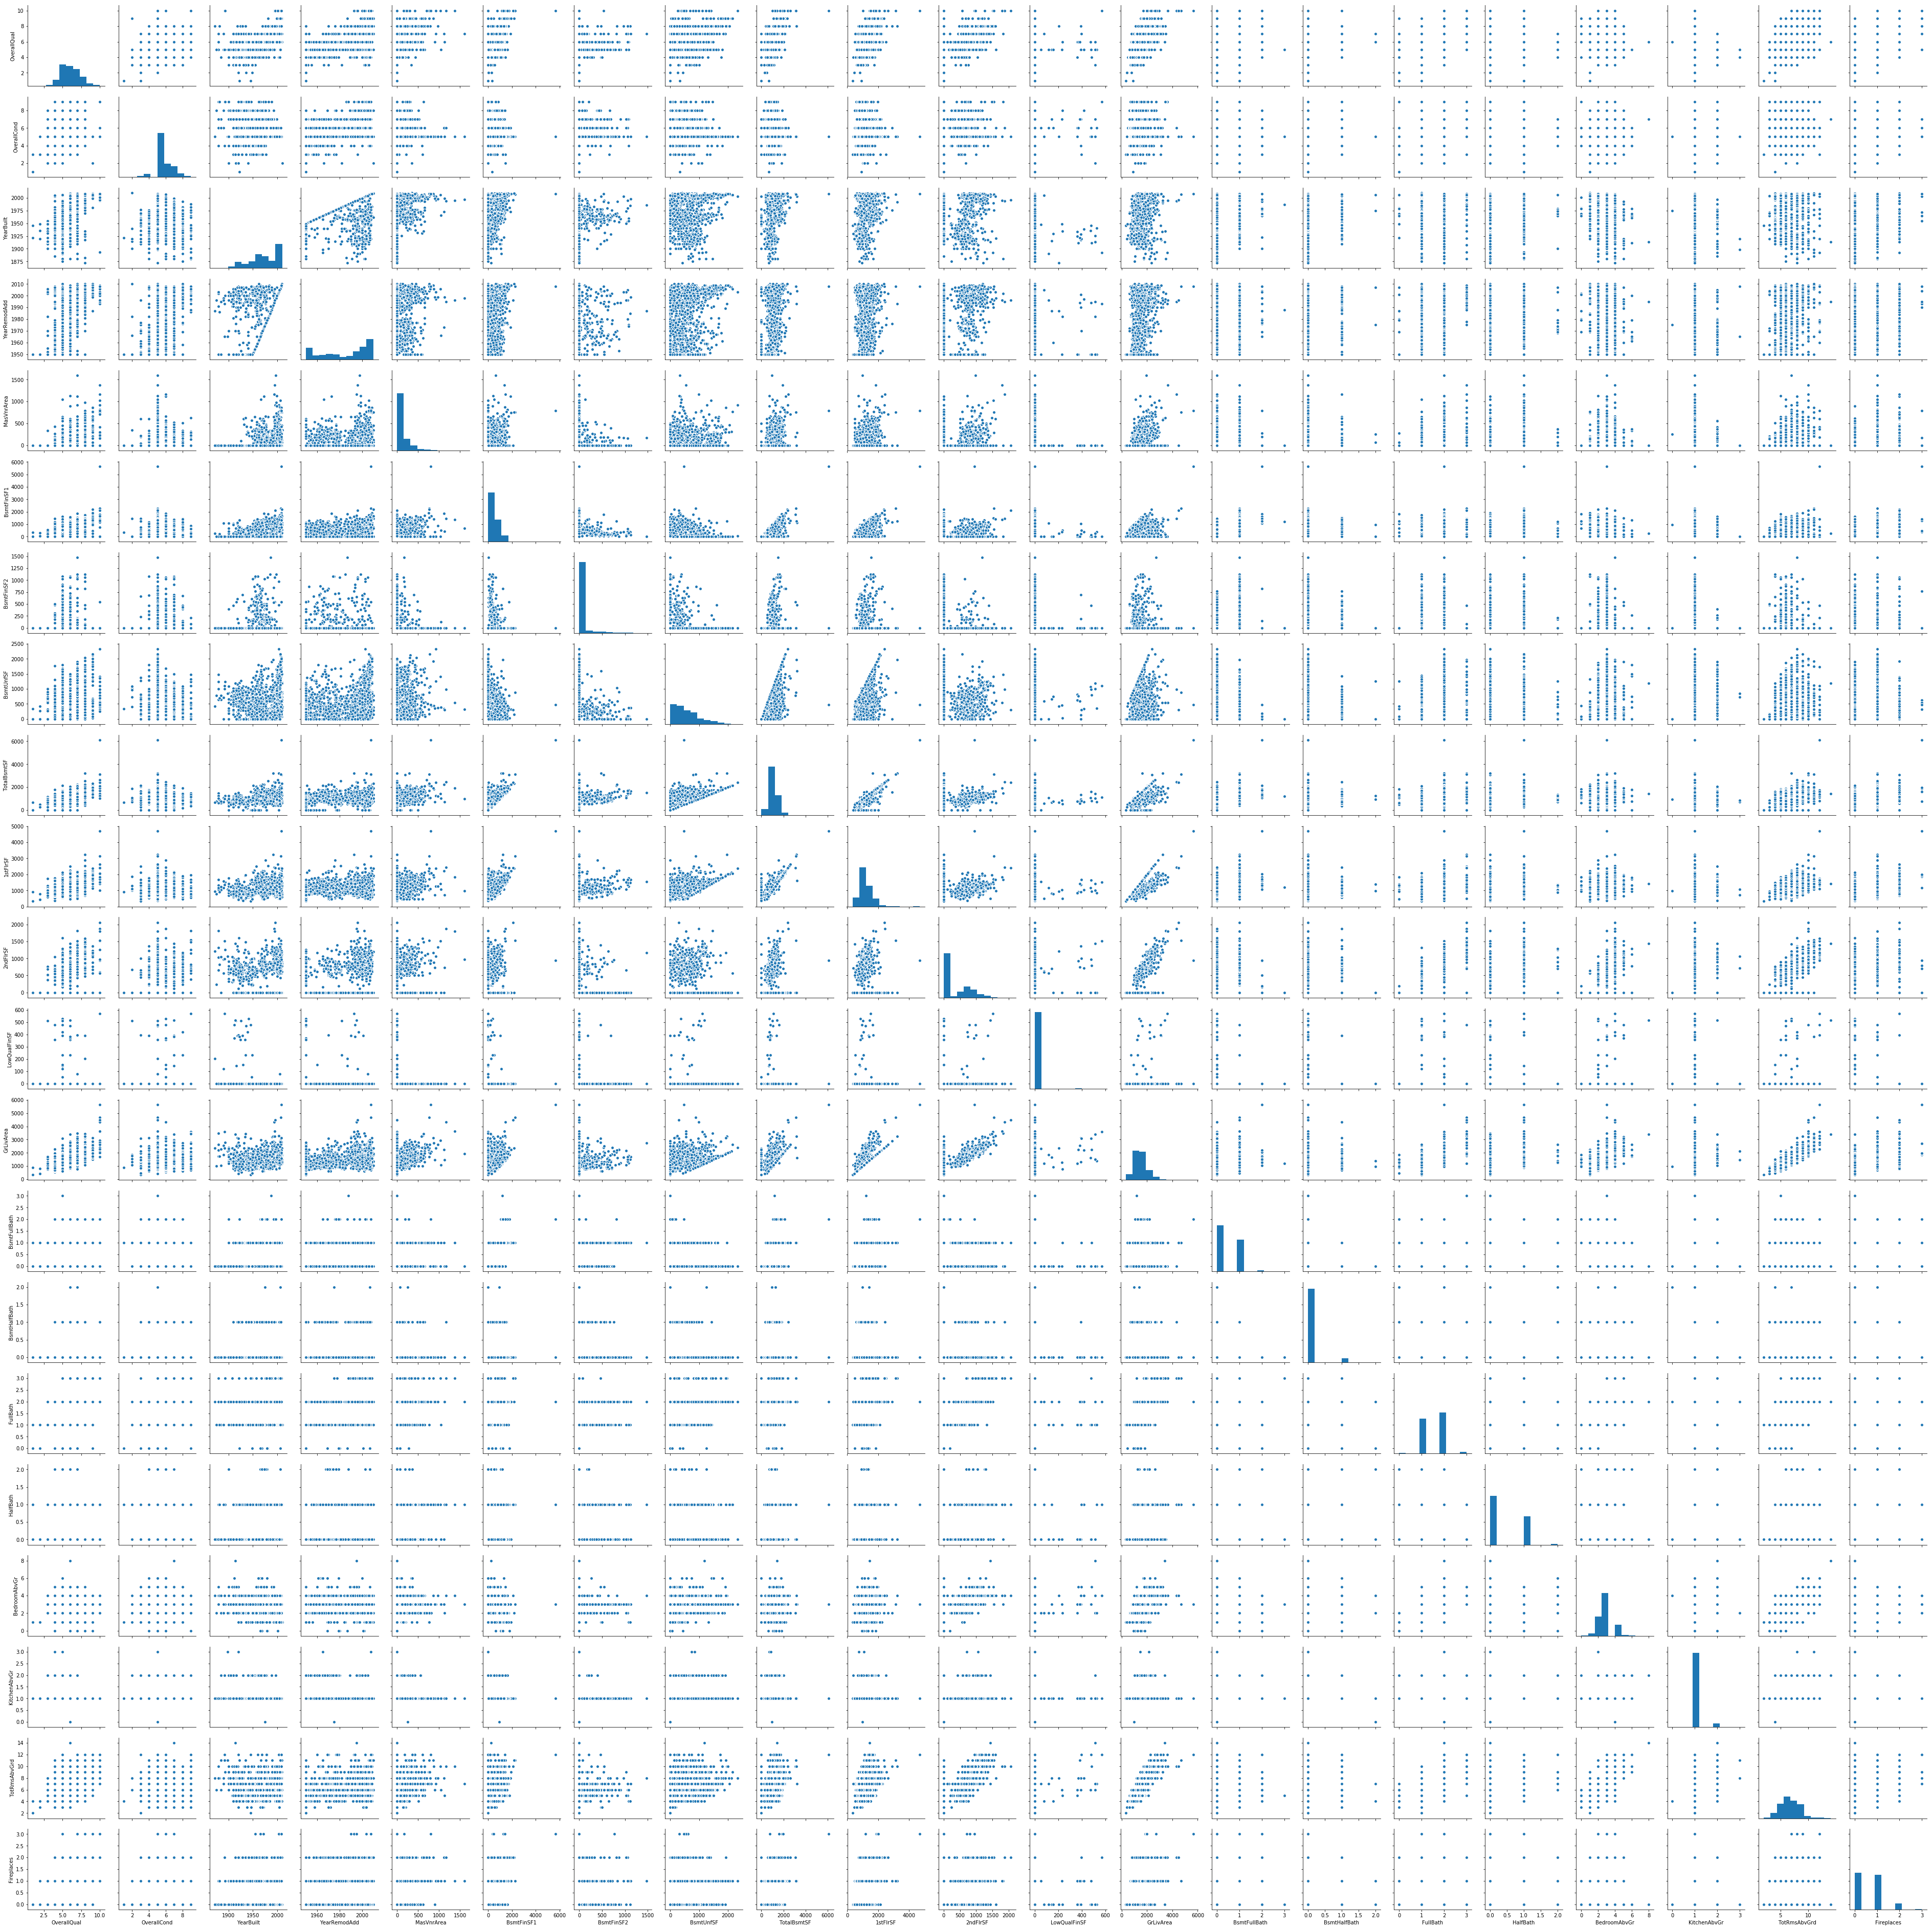

In [77]:
#looking at linear relations 
sns.pairplot(props_df.iloc[:,1:])

### Outside area and dates df

In [78]:
#looking at the outside area and dates 
print(outside_df.shape)
outside_df.head()

(1460, 24)


Id GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0   1     Attchd       2003.0          RFn           2         548         TA   
1   2     Attchd       1976.0          RFn           2         460         TA   
2   3     Attchd       2001.0          RFn           2         608         TA   
3   4     Detchd       1998.0          Unf           3         642         TA   
4   5     Attchd       2000.0          RFn           3         836         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   
3         TA          Y           0           35            272          0   
4         TA          Y         192           84              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   
3            0         0    NaN   NaN         NaN        0       2    2006   
4            0         0    NaN   NaN         NaN        0      12    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500  
3       WD       Abnorml     140000  
4       WD        Normal     250000

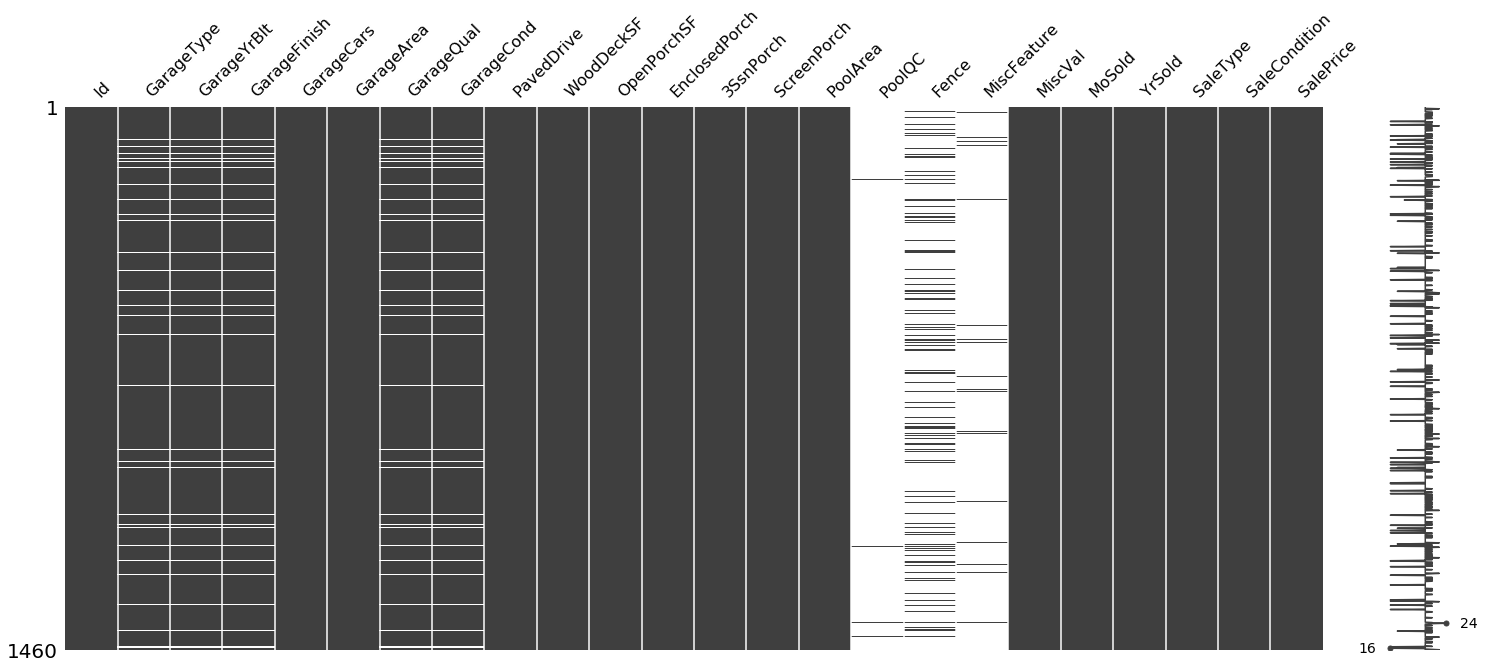

In [79]:
msno.matrix(outside_df)

In [80]:
outside_df.isnull().sum()

Id                  0
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

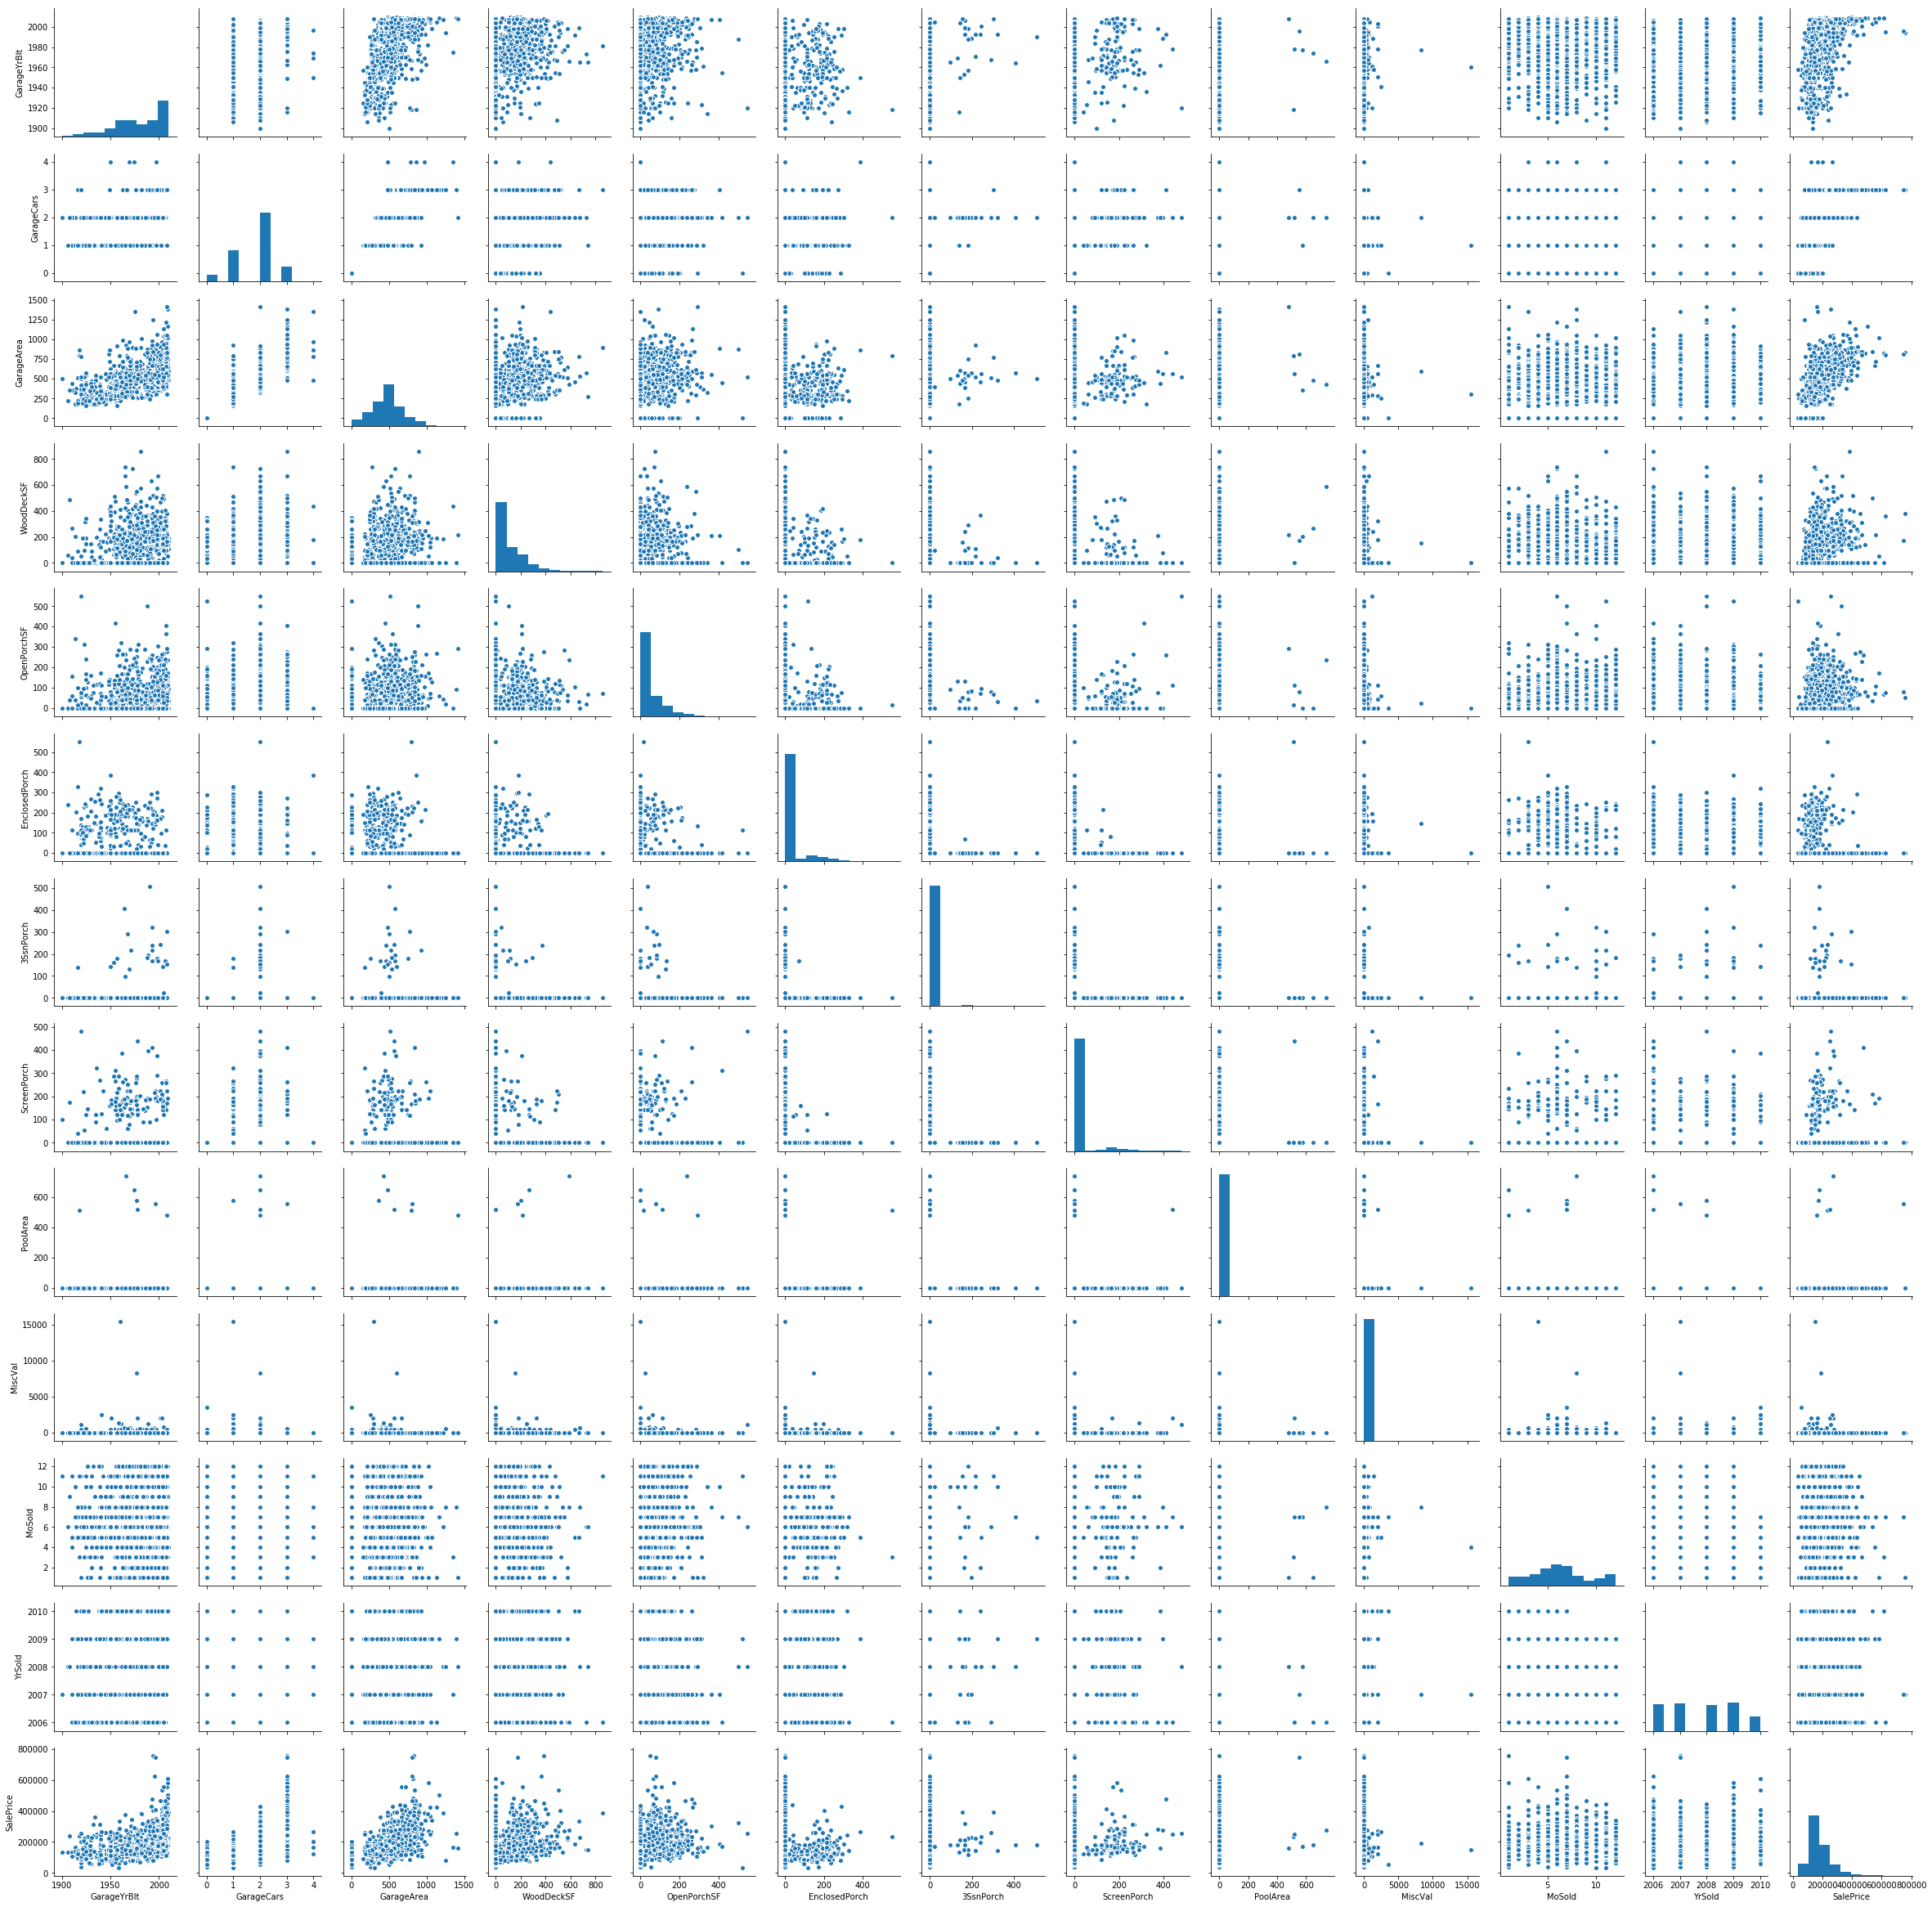

In [81]:
sns.pairplot(outside_df.iloc[:,1:])

# models

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import bayes

In [96]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [99]:
type(df.SalePrice)

pandas.core.series.Series

In [346]:
#creating a new data frame of saleprice correlations in order to make a heatmap 
sale_corr = pd.DataFrame(df.corrwith(df.SalePrice)).sort_values(by = 0, axis = 0,ascending = False)
sale_corr.rename(columns={0:'Saleprice_corr'},inplace=True)

plt.figure(figsize=(10,12))
sns.heatmap(sale_corr,annot=True)

In [362]:
## columns with nulls
df.loc[:, df.isna().any()].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [387]:
col = [
    'OverallQual',
    'GarageArea',
    'YearBuilt',
    'GrLivArea',
    'TotRmsAbvGrd',
    'FullBath'
]

X = df[col]
y = df['SalePrice']

In [388]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [389]:
x_train.shape

(1095, 6)

In [390]:
lr_model = LinearRegression(normalize=True)

In [391]:
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [392]:
lr_model.score(x_train,y_train)

0.7563416379474739

In [393]:
lr_pred = lr_model.predict(x_test)

In [394]:
mean_squared_error(y_test,lr_pred)

1737760481.1991525